In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
np.random.seed(101)
tf.set_random_seed(101)

In [17]:
rand_a = np.random.uniform(0,100,(5,5))

In [18]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [19]:
rand_b = np.random.uniform(0,100,(5,1))

In [20]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [21]:
a = tf.placeholder(tf.float32)

In [22]:
b = tf.placeholder(tf.float32)

In [28]:
mul_element_wise = tf.multiply(a, b)
add_op = a + b
mul_op = a * b

In [33]:
with tf.Session() as sess:
    add_results = sess.run(add_op, feed_dict={a:10, b:20})
    mul_results = sess.run(mul_op, feed_dict = {a:[1,2,3], b:[[12], [23], [34]]})
    print(add_results,' and ', mul_results)

30.0  and  [[ 12.  24.  36.]
 [ 23.  46.  69.]
 [ 34.  68. 102.]]


### SAMEPLE NEURAL NETWORK:

In [34]:
n_features = 10
n_dense_neurons = 3

In [36]:
x = tf.placeholder(tf.float32, shape=(None, n_features))


In [37]:
W = tf.Variable(initial_value=tf.random_normal([n_features, n_dense_neurons]))

b = tf.Variable(initial_value= tf.ones([n_dense_neurons]))

In [38]:
xW = tf.matmul(x, W)

In [40]:
z = tf.add(xW,b)

In [41]:
a = tf.sigmoid(z)

In [42]:
init = tf.global_variables_initializer()

In [44]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1,n_features])})

In [45]:
print(layer_out)

[[0.5372551  0.00419103 0.9872089 ]]


### SIMPLE REGRESSION EXAMPLE:

In [46]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [48]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [49]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [50]:
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

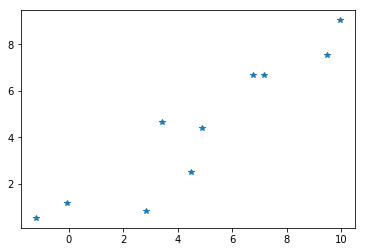

In [57]:

plt.plot(x_data, y_label, '*')

y = mx + b

In [58]:
m = tf.Variable(initial_value=np.random.rand(2)[0])

In [59]:
b = tf.Variable(initial_value=np.random.rand(2)[1])

In [60]:
error = 0
for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [61]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [62]:
train = optimizer.minimize(error)

In [63]:
init = tf.global_variables_initializer()

In [70]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])    

In [71]:
x_test = np.linspace(-1,11,10)

In [72]:
y_pred_plot = final_slope * x_test + final_intercept

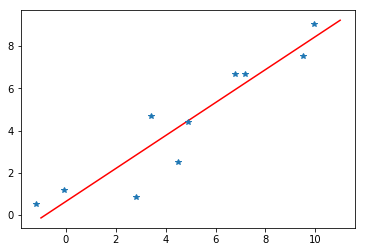

In [73]:
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data, y_label, '*')